# Learning Embeddings

This tutorial will go through steps for building a deep learning model for sentiment Analysis. We will classify IMDB movie reviews as either positive or negative. This tutorial will be used for teaching during the workshop.

The tutorial has taken contents from various places including the tutorial from http://www.hvass-labs.org/ for the purpose of teaching in the deep learning class.

The topics addressed in the tutorial:

1. Basic exploration of the IMDB movies dataset.
2. Tokenization, text to sequences, padding and truncating
3. Building NN Model using Bag Of Words
4. Building NN Model using Embeddings
5. Peeping to Word Embeddings

We will be exploring mostly how to use Bag of Words and Word Embeddings vector representation of texts and build plain vanila NN models. In the future tutorials, we will explore RNN, LSTM models in the future.

### IMDB Movie Reviews

The dataset is available at https://www.kaggle.com/c/word2vec-nlp-tutorial/data

The labeled data set consists of 50,000 IMDB movie reviews, specially selected for sentiment analysis. The sentiment of reviews is binary, meaning the IMDB rating < 5 results in a sentiment score of 0, and rating >=7 have a sentiment score of 1. No individual movie has more than 30 reviews.

**Data Fields**

- id - Unique ID of each review
- sentiment - Sentiment of the review; 1 for positive reviews and 0 for negative reviews
- review - Text of the review

### Loading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
reviews_df = pd.read_csv('https://raw.githubusercontent.com/manaranjanp/GenAI_LLM/main/Embeddings/reviews.zip')

In [3]:
pd.set_option('display.max_colwidth', 500)
reviews_df.head(5)

,review,sentiment
0,"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle m...",1
1,"\The Classic War of the Worlds\"" by Timothy Hines is a very entertaining film that obviously goes to great effort and lengths to faithfully recreate H. G. Wells' classic book. Mr. Hines succeeds in doing so. I, and those who watched his film with me, appreciated the fact that it was not the standard, predictable Hollywood fare that comes out every year, e.g. the Spielberg version with Tom Cruise that had only the slightest resemblance to the book. Obviously, everyone looks for different thin...",1
2,"The film starts with a manager (Nicholas Bell) giving welcome investors (Robert Carradine) to Primal Park . A secret project mutating a primal animal using fossilized DNA, like ¨Jurassik Park¨, and some scientists resurrect one of nature's most fearsome predators, the Sabretooth tiger or Smilodon . Scientific ambition turns deadly, however, and when the high voltage fence is opened the creature escape and begins savagely stalking its prey - the human visitors , tourists and scientific.Meanwh...",0
3,"It must be assumed that those who praised this film (\the greatest filmed opera ever,\"" didn't I read somewhere?) either don't care for opera, don't care for Wagner, or don't care about anything except their desire to appear Cultured. Either as a representation of Wagner's swan-song, or as a movie, this strikes me as an unmitigated disaster, with a leaden reading of the score matched to a tricksy, lugubrious realisation of the text.<br /><br />It's questionable that people with ideas as to w...",0
4,"Superbly trashy and wondrously unpretentious 80's exploitation, hooray! The pre-credits opening sequences somewhat give the false impression that we're dealing with a serious and harrowing drama, but you need not fear because barely ten minutes later we're up until our necks in nonsensical chainsaw battles, rough fist-fights, lurid dialogs and gratuitous nudity! Bo and Ingrid are two orphaned siblings with an unusually close and even slightly perverted relationship. Can you imagine playfully...",1


In [4]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     25000 non-null  object
 1   sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


### Data Tokenization

The text data need to be converted into vectors using either bag of words or embeddings model. We will first explore bag of words (BOW) model. In the BOW model, a sentence will be represented as a vector with the words (also called tokens) as dimensions of the vectors.

For the purpose of creating vectors, we need to tokenize the sentences first and find out all unique tokens (words) used across all sentences. The corpus of unquie words used could very large, so we can limit the corpus of tokens by using only the most popular (frequently used) words. In this example, we will use 10000 words.

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer

In [6]:
all_tokenizer = Tokenizer()

In [7]:
all_tokenizer.fit_on_texts( reviews_df.review )

In [8]:
all_tokenizer.document_count

25000

In [9]:
len(all_tokenizer.word_counts)

88582

In [13]:
all_tokenizer.word_index['the']

1

In [14]:
all_tokenizer.word_index['movie']

17

In [10]:
all_tokenizer.texts_to_sequences( ["The movie gladiator is a brilliant movie"])

[[1, 17, 8623, 6, 3, 526, 17]]

There are 25000 documents (reviews) and 88582 unique words.

We can assume the low frequencey words are rarely used to express sentiments as they have appeared only once across all reviews. And only choose to keep top N (for example 10000) words for our analysis. So, let's tokenize agains with a limit to number of words to 10000.

In [15]:
max_num_tokens = 10000

In [16]:
max_review_length = 500

How many sentences will not be truncated at all?

Now we will pad or truncate. But padding or truncating can be done at the beginning of the sentence or at the end of the sentences. *pre* or *post* can be used to specify the padding and truncating the beginning or end of sentence.

In [17]:
from keras.layers import TextVectorization

In [18]:
vectorize_layer = TextVectorization(max_tokens = max_num_tokens,
                                    output_mode='int',
                                    output_sequence_length = max_review_length,
                                    standardize='lower_and_strip_punctuation',
                                    split='whitespace')

In [19]:
text_dataset = tf.data.Dataset.from_tensor_slices(list(reviews_df.review))

In [20]:
vectorize_layer.adapt(text_dataset.batch(64))

In [21]:
vectorize_layer.get_vocabulary()[0:10]

['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it']

### Split Datasets

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(reviews_df.review,
                                                    reviews_df.sentiment,
                                                    test_size = 0.2)

In [25]:
X_train.shape

(20000,)

In [26]:
X_test.shape

(5000,)

In [27]:
input_shape = X_train.shape

In [28]:
input_shape

(20000,)

### Using Embeddings

In Word embeddings, words are represented by a vector i.e. series of numbers (weights). The vectors represent words in a N dimension space, in which similar meaning words are places nearer to each other while the dissimilar words are kept far. The dimensions in the space represent some latent factors, by which the words could be defined. All words are assigned some weights in each each latent factors. Words that share some common meaning have similar weights across common factors.

The word embeddings weights can be estimated during the NN model building. There are also pre-built word embeddings are available, which can be used in the model. We will discuss about the pre-built word embeddings later in the tutorial.

Word embeddings are commonly used in many Natural Language Processing (NLP) tasks because they are found to be useful representations of words and often lead to better performance in the various tasks performed. Given its widespread use, this post seeks to introduce the concept of word embeddings to the prospective NLP practitioner.

Here are couple of good references to understand embeddings

https://medium.com/huggingface/universal-word-sentence-embeddings-ce48ddc8fc3a

(Bag of words) -> Embeddings (8) -> Dense Layer(16) ->  Relu -> Dense Layer(1) -> Sigmoid

In [33]:
from keras import Sequential
from keras.layers import Embedding, Flatten, Activation, Dense
from keras.optimizers import SGD

In [39]:
keras.backend.clear_session()  # clear default graph

emb_model = Sequential()
emb_model.add(tf.keras.Input(shape=(1,), dtype=tf.string))
emb_model.add(vectorize_layer)
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs
emb_model.add(Embedding(max_num_tokens, 8, input_length=max_review_length, name='layer_embedding'))
# After the Embedding layer,
# our activations have shape `(samples, maxlen, 8)`.

# We flatten the 3D tensor of embeddings
# into a 2D tensor of shape `(samples, maxlen * 8)`
emb_model.add(Flatten())

emb_model.add(Dense(16))
emb_model.add(Activation('relu'))

# We add the classifier on top
emb_model.add(Dense(1))
emb_model.add(Activation('sigmoid'))

In [40]:
emb_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 500)               0         
 ctorization)                                                    
                                                                 
 layer_embedding (Embedding  (None, 500, 8)            80000     
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4000)              0         
                                                                 
 dense (Dense)               (None, 16)                64016     
                                                                 
 activation (Activation)     (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 1

In [41]:
sgd = SGD(learning_rate=0.01, momentum=0.8)

In [42]:
emb_model.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [43]:
emb_history = emb_model.fit(X_train,
                            y_train,
                            epochs=10,
                            batch_size=32,
                            validation_split=0.3)

Epoch 1/20
438/438 [==============================] - 34s 69ms/step - loss: 0.6931 - accuracy: 0.5021 - val_loss: 0.6932 - val_accuracy: 0.5032
Epoch 2/20
438/438 [==============================] - 17s 38ms/step - loss: 0.6922 - accuracy: 0.5193 - val_loss: 0.6929 - val_accuracy: 0.5010
Epoch 3/20
438/438 [==============================] - 12s 28ms/step - loss: 0.6908 - accuracy: 0.5287 - val_loss: 0.6922 - val_accuracy: 0.5197
Epoch 4/20
438/438 [==============================] - 8s 18ms/step - loss: 0.6892 - accuracy: 0.5312 - val_loss: 0.6911 - val_accuracy: 0.5257
Epoch 5/20
438/438 [==============================] - 6s 13ms/step - loss: 0.6854 - accuracy: 0.5584 - val_loss: 0.6881 - val_accuracy: 0.5528
Epoch 6/20
438/438 [==============================] - 5s 12ms/step - loss: 0.6727 - accuracy: 0.5956 - val_loss: 0.6719 - val_accuracy: 0.5893
Epoch 7/20
438/438 [==============================] - 6s 13ms/step - loss: 0.6319 - accuracy: 0.6625 - val_loss: 0.6215 - val_accuracy: 0.6

In [44]:
def plot_accuracy(hist):
    plt.plot(hist['accuracy'])
    plt.plot(hist['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train',
                'test'],
               loc='upper left')
    plt.show()

def plot_loss(hist):
    plt.plot(hist['loss'])
    plt.plot(hist['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train',
                'test'],
               loc='upper left')
    plt.show()

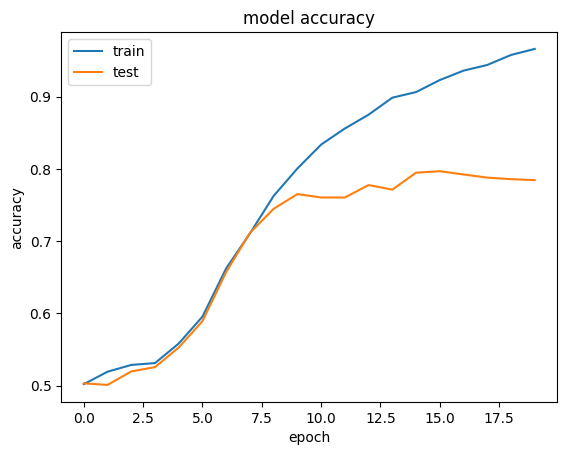

In [45]:
plot_accuracy( emb_history.history )

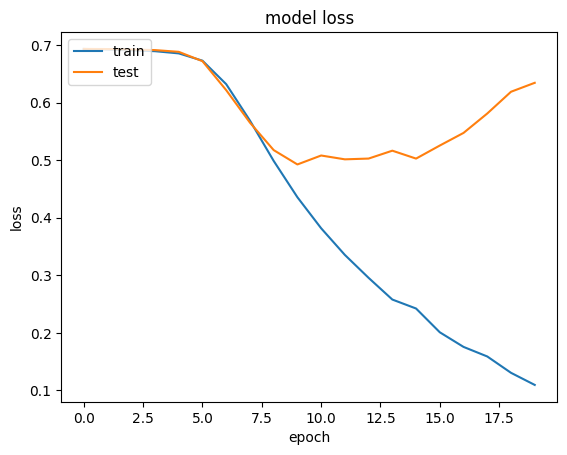

In [46]:
plot_loss( emb_history.history )

#### Conclusion:

The model is overfitting. The training accuracy is about 98%, whereas the validation accuracy is 80%.

### Peeping into Embeddings

We will look at the embeddings estimated for different words and if they are placed neared or far as per their meaning.

In [47]:
layer_embedding = emb_model.get_layer('layer_embedding')

In [48]:
weights_embedding = layer_embedding.get_weights()[0]

In [49]:
weights_embedding.shape

(10000, 8)

In [53]:
vocab_list = vectorize_layer.get_vocabulary()

In [54]:
vocab_list.index('good')

50

In [55]:
def get_embeddings( word ):
    token = vocab_list.index('good')
    return weights_embedding[token]

In [56]:
good = get_embeddings('good')
good

array([ 0.02494001, -0.02870356, -0.04132547, -0.28264898, -0.02343316,
       -0.09254625,  0.04335956, -0.12517598], dtype=float32)

In [57]:
great = get_embeddings('great')
great

array([ 0.02494001, -0.02870356, -0.04132547, -0.28264898, -0.02343316,
       -0.09254625,  0.04335956, -0.12517598], dtype=float32)

In [58]:
bad = get_embeddings('bad')
bad

array([ 0.02494001, -0.02870356, -0.04132547, -0.28264898, -0.02343316,
       -0.09254625,  0.04335956, -0.12517598], dtype=float32)

In [59]:
terrible = get_embeddings('terrible')
terrible

array([ 0.02494001, -0.02870356, -0.04132547, -0.28264898, -0.02343316,
       -0.09254625,  0.04335956, -0.12517598], dtype=float32)

We will calculate the euclidean distance between the word embeddings.

In [60]:
from scipy.spatial.distance import cdist

In [63]:
def get_distance( word1, word2 ):

    word1_token = vocab_list.index(word1)
    word2_token = vocab_list.index(word2)

    return cdist([weights_embedding[word1_token]],
                 [weights_embedding[word2_token]],
                 metric = 'euclidean')

In [64]:
get_distance( 'good',
             'awesome' )

array([[0.38592105]])

In [65]:
get_distance( 'good', 'bad' )

array([[0.88495584]])

In [66]:
get_distance( 'bad', 'terrible' )

array([[0.18731015]])

In [67]:
get_distance( 'great', 'terrible' )

array([[1.07546224]])

In [68]:
get_distance( 'awesome', 'terrible' )

array([[0.86302145]])

It can be observed that the words *good* and *great* are places together, while *bad* and *terrible* are place together. And the words *good* and *terrible* are place far. This indicates the embeddings have incorporated the meaning of the words as per how they are used in the sentences expressing positive and negative sentiments.

Some more examples expressing sentiments.

### Participant Exercise: 1

- Build a model with an embedding layer of 16 or 32
- Add one more dense layer
- Change the number of neurons in dense layer
- Build a model and check accuracy


### Participant Exercise: 2

- Explore words, their embeddings and distances between them.

## Excellent References

For further exploration and better understanding, you can use the following references.

- Glossary of Deep Learning: Word Embedding

    https://medium.com/deeper-learning/glossary-of-deep-learning-word-embedding-f90c3cec34ca


- wevi: word embedding visual inspector

    https://ronxin.github.io/wevi/  
    
    
- Learning Word Embedding    

    https://lilianweng.github.io/lil-log/2017/10/15/learning-word-embedding.html


- On the contribution of neural networks and word embeddings in Natural Language Processing

    https://medium.com/@josecamachocollados/on-the-contribution-of-neural-networks-and-word-embeddings-in-natural-language-processing-c8bb1b85c61c